In [7]:
import glob
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

### data import

In [33]:
def concat_dfs(directory):
    files = glob.glob(directory)
    df = []

    for f in files:   
        col_name = f.split('/')[-1].split('.')[0]
        
        try:
            csv = pd.DataFrame(pd.read_excel(f)['AreaSol_19'])
        except:
            csv = pd.DataFrame(pd.read_excel(f)['areasol_19'])
        csv.columns = [col_name]
        csv.reset_index(drop=True)
        csv = csv.dropna()
        csv = csv.loc[(csv!=0).any(axis=1)]
        df.append(csv)
    
    df2 = pd.concat(df,axis=1)
    return df2.reindex(sorted(df2.columns), axis=1)

In [36]:
living_trees = concat_dfs(r'./data/zywe_drzewa_tabele/*.xls')
living_trees.head()

,1992,2003,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0,605144.0
1,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0,829152.0
2,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0,763632.0
3,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0,629611.0
4,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0,759910.0


In [10]:
dead_trees = concat_dfs(r'./data/martwe_drzewa_tabele/*.xls')
dead_trees.head()

,1993_2003,2004_2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1098440.0,1036060,1211900.0,1044330.0,1045020.0,820313.0,954810.0,1197670.0,833079.0,858394.0,858394.0
1,1038630.0,1110970,1148300.0,1043260.0,848815.0,937486.0,1076740.0,1091500.0,895534.0,754292.0,754292.0
2,1139860.0,1022490,1054120.0,1035460.0,1153660.0,933327.0,1012080.0,1146190.0,797180.0,1016430.0,1016430.0
3,1234160.0,1180520,1046510.0,1120320.0,1099150.0,950140.0,903199.0,1134260.0,1007030.0,1009570.0,1009570.0
4,1052250.0,1073820,1087380.0,NaN,1095470.0,1140150.0,915426.0,1089420.0,1199450.0,887906.0,887906.0


### data preview

In [11]:
dead_1993_2003 = pd.DataFrame(dead_trees['1993_2003']).dropna().reset_index(drop = True)
dead_2004_2013 = pd.DataFrame(dead_trees['2004_2013']).dropna().reset_index(drop = True)

dead_2014_2018 = pd.DataFrame(dead_trees[['2014', '2015', '2016', '2017', '2018']]
                              .melt()['value']
                              .dropna()
                              .reset_index(drop = True))
dead_2019_2022 = pd.DataFrame(dead_trees[['2019', '2020', '2021', '2022']]
                              .melt()['value']
                              .dropna()
                              .reset_index(drop = True))

living_2003 = pd.DataFrame(living_trees['2003']).dropna().reset_index(drop = True)
living_2013 = pd.DataFrame(living_trees['2013']).dropna().reset_index(drop = True)
living_2018 = pd.DataFrame(living_trees['2018']).dropna().reset_index(drop = True)
living_2022 = pd.DataFrame(living_trees['2022']).dropna().reset_index(drop = True)

years_1993_2003 = (pd.concat([dead_1993_2003, living_2003], axis = 1)
                   .rename(columns = {
                       '1993_2003' : 'martwe 1993-2013',
                       '2003' : 'żywe 2003'
                   }))

years_2004_2013 = (pd.concat([dead_2004_2013, living_2013], axis = 1)
                   .rename(columns = {
                       '2004_2013' : 'martwe 2004-2013',
                       '2013' : 'żywe 2013'
                   }))

years_2014_2018 = (pd.concat([dead_2014_2018, living_2018], axis = 1)
                   .rename(columns = {
                       'value' : 'martwe 2014-2018',
                       '2018' : 'żywe 2018'
                   }))
years_2019_2022 = (pd.concat([dead_2019_2022, living_2022], axis = 1)
                   .rename(columns = {
                       'value' : 'martwe 2019-2022',
                       '2022' : 'żywe 2022'
                   }))

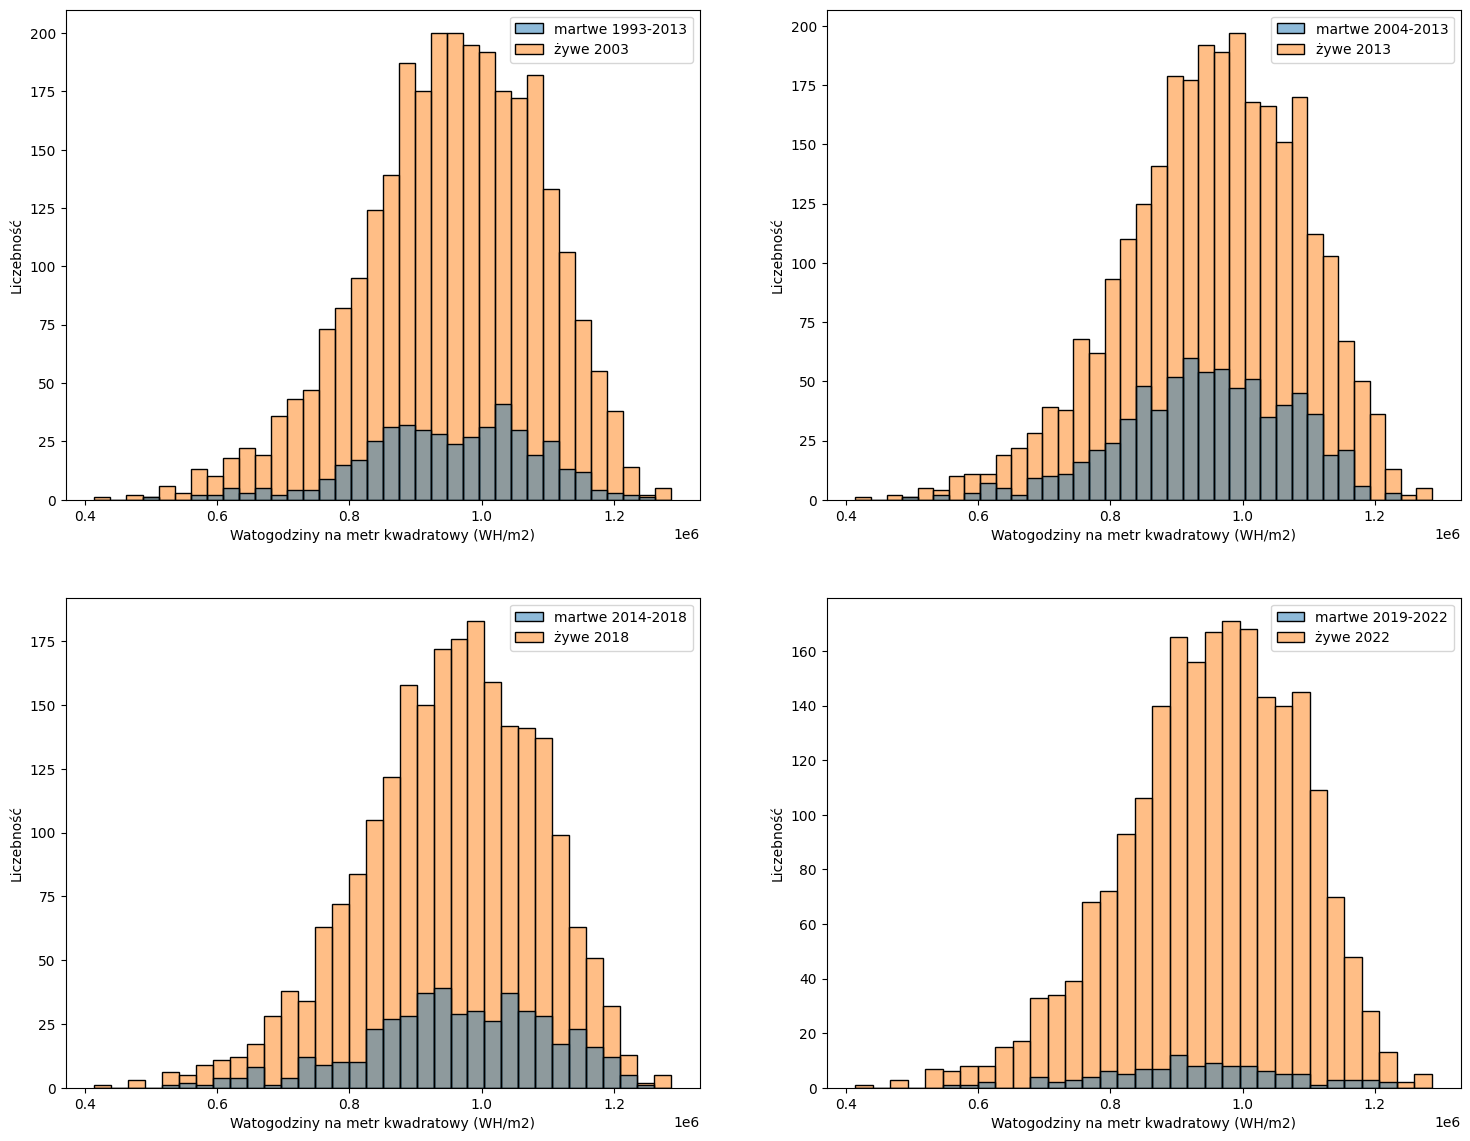

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

sns.histplot(years_1993_2003, ax=ax[0][0])
sns.histplot(years_2004_2013, ax=ax[0][1])
sns.histplot(years_2014_2018, ax=ax[1][0])
sns.histplot(years_2019_2022, ax=ax[1][1])

for i in range(0,2):
    for j in range(0,2):
        ax[i][j].set_ylabel("Liczebność")
        ax[i][j].set_xlabel("Watogodziny na metr kwadratowy (WH/m2)")

### statistical tests

##### 1993 - 2003

In [29]:
ks_2samp(years_1993_2003.iloc[:,0].dropna(), years_1993_2003.iloc[:,1].dropna())

KstestResult(statistic=0.04551494284360354, pvalue=0.3873469180875512)

##### 2004 - 2013

In [31]:
ks_2samp(years_2004_2013.iloc[:,0].dropna(), years_2004_2013.iloc[:,1].dropna())

KstestResult(statistic=0.056741109145870085, pvalue=0.04192335579823665)

##### 2014 - 2018

In [32]:
ks_2samp(years_2014_2018.iloc[:,0].dropna(), years_2014_2018.iloc[:,1].dropna())

KstestResult(statistic=0.06618381756253208, pvalue=0.06081588904714866)

##### 2019 - 2022

In [27]:
ks_2samp(years_2019_2022.iloc[:,0].dropna(), years_2019_2022.iloc[:,1].dropna())

KstestResult(statistic=0.12325488631830873, pvalue=0.06615075809304301)